In [1]:
import tifffile as tf
import numpy as np
from skimage.feature import peak_local_max
from skimage.filters import gaussian
from matplotlib import pyplot as plt
from trapanalysis import TrapGetter

/home/mjsf3/anaconda3/lib/python3.7/site-packages/tifffile/tifffile.py:2321: UserWarning: ome-xml: failed to read '260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos4.ome.tif'
  "ome-xml: failed to read '%s'" % fname)
/home/mjsf3/anaconda3/lib/python3.7/site-packages/tifffile/tifffile.py:2321: UserWarning: ome-xml: failed to read '260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos9.ome.tif'
  "ome-xml: failed to read '%s'" % fname)
/home/mjsf3/anaconda3/lib/python3.7/site-packages/tifffile/tifffile.py:2321: UserWarning: ome-xml: failed to read '260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos10.ome.tif'
  "ome-xml: failed to read '%s'" % fname)
/home/mjsf3/anaconda3/lib/python3.7/site-packages/tifffile/tifffile.py:2321: UserWarning: ome-xml: failed to read '260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos11.ome.tif'
  "ome-xml: failed to read '%s'" % fname)
/home/mjsf3/anaconda3/lib/python3.7/site-packages/tifffile/tifffile.py:2321: UserWarning: ome-xml:

(1, 1, 2)


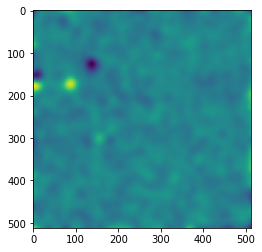

frame of movement  129
[[127 137]]
[[127 137]]
(1, 1, 2)


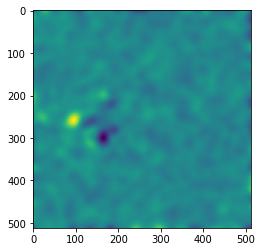

frame of movement  131
(1, 1, 2)


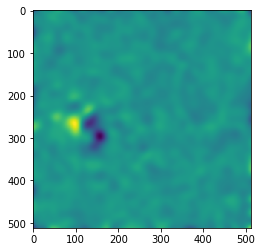

frame of movement  136
(1, 1, 2)


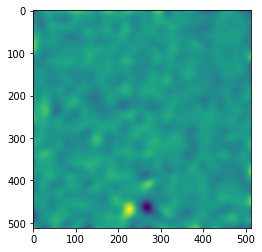

frame of movement  142
(1, 1, 2)


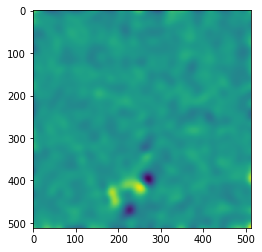

frame of movement  143
(1, 1, 2)


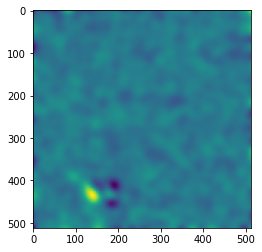

frame of movement  165
(1, 1, 2)


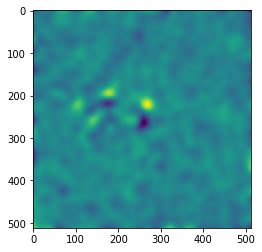

frame of movement  181
(1, 2, 2)
[[ 28 -79]]


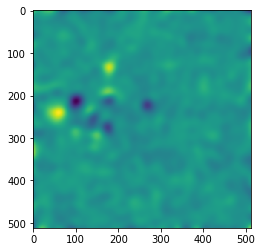

frame of movement  182
(1, 1, 2)


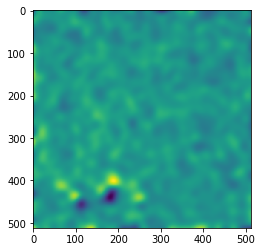

frame of movement  205
(1, 1, 2)


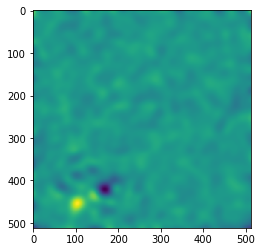

frame of movement  206
(1, 1, 2)


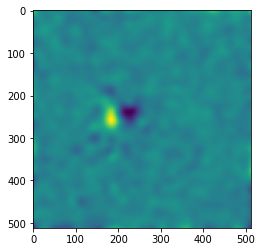

frame of movement  212
(1, 1, 2)


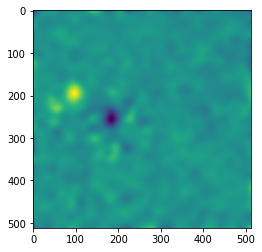

frame of movement  213
(1, 1, 2)


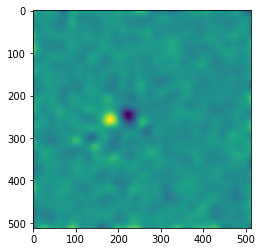

frame of movement  248
(1, 1, 2)


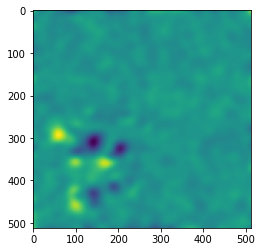

frame of movement  249
(1, 1, 2)


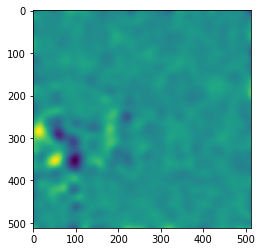

frame of movement  250
(1, 1, 2)


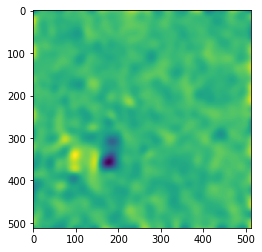

frame of movement  252
(1, 1, 2)


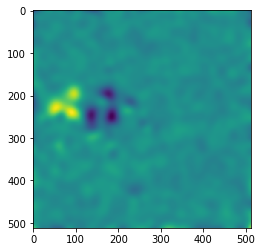

frame of movement  258
(1, 1, 2)


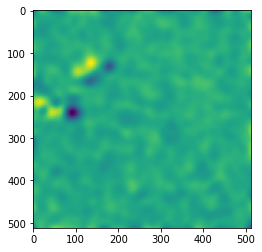

frame of movement  259
(1, 1, 2)


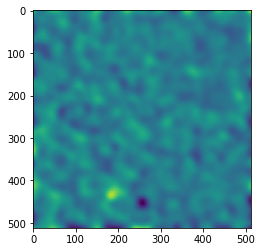

frame of movement  261
(1, 1, 2)


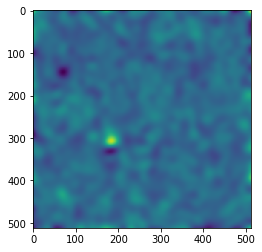

frame of movement  267
(1, 1, 2)


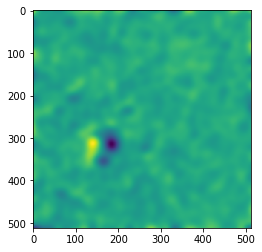

frame of movement  268
(1, 1, 2)


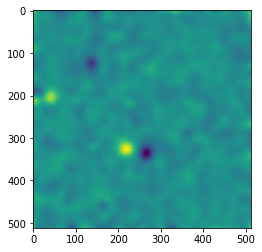

frame of movement  273
(1, 1, 2)


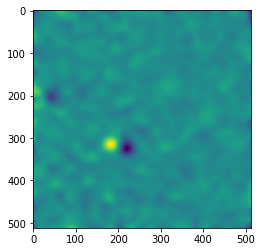

frame of movement  274
(1, 1, 2)


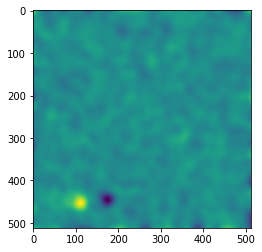

frame of movement  276
(1, 1, 2)


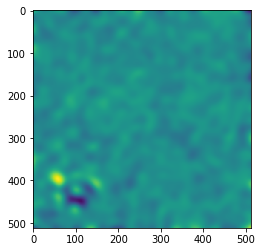

frame of movement  277
(1, 1, 2)


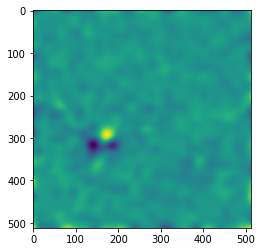

frame of movement  280
(1, 2, 2)
[[-92 -19]]
[[-92 -19]]
[[False  True]]


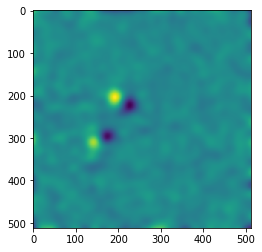

frame of movement  281
(1, 1, 2)


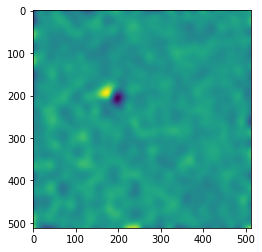

frame of movement  282
(1, 1, 2)


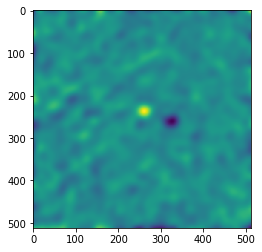

frame of movement  285
(1, 1, 2)


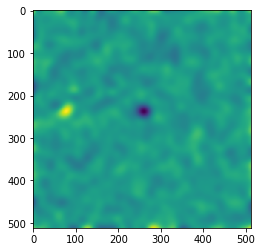

frame of movement  286
(1, 1, 2)


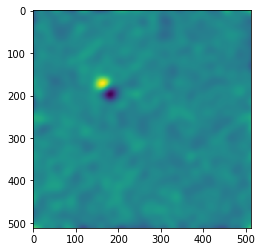

frame of movement  297
(1, 1, 2)


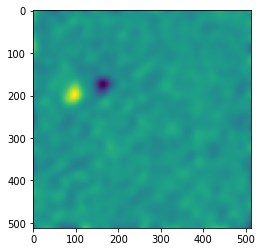

frame of movement  298
(1, 1, 2)


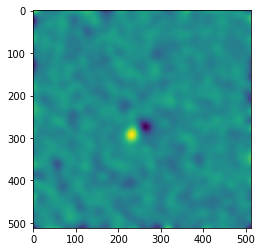

frame of movement  338
(1, 1, 2)


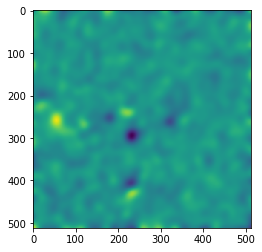

frame of movement  339
(1, 1, 2)


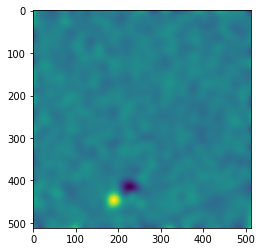

frame of movement  360
(1, 1, 2)


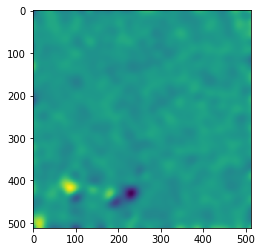

frame of movement  361
(1, 1, 2)


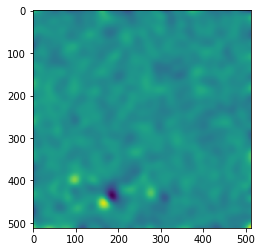

frame of movement  390
(1, 2, 2)
[[ 36 -81]]


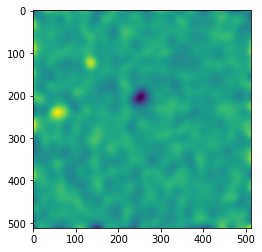

frame of movement  397
(1, 1, 2)


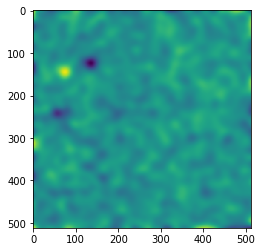

frame of movement  398
(1, 1, 2)


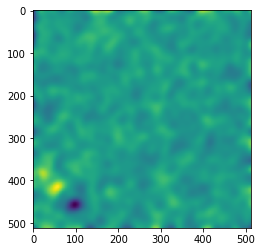

frame of movement  497
(1, 1, 2)


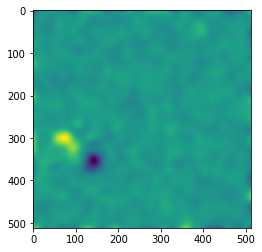

frame of movement  535
(1, 1, 2)


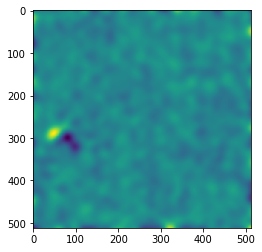

frame of movement  536
(1, 1, 2)


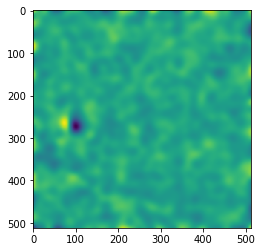

frame of movement  649
(1, 1, 2)


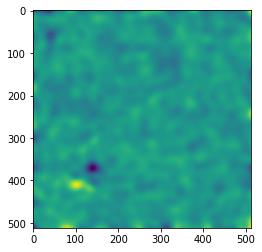

frame of movement  752
(1, 1, 2)


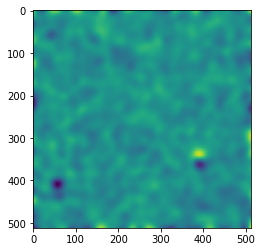

frame of movement  754
(1, 1, 2)


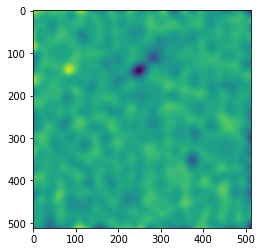

frame of movement  773
(1, 1, 2)


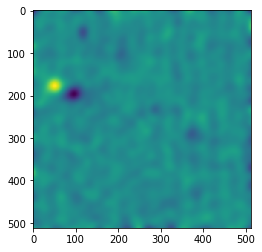

frame of movement  782
(1, 1, 2)


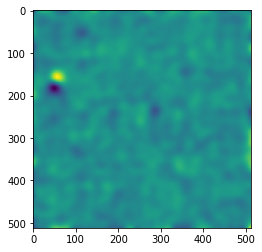

frame of movement  783
(1, 1, 2)


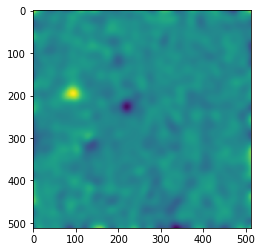

frame of movement  794
(1, 1, 2)


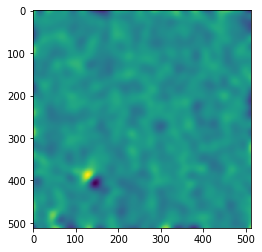

frame of movement  977
(1, 1, 2)


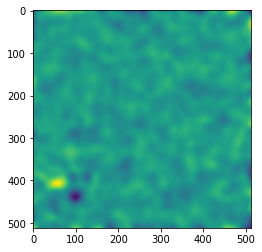

frame of movement  992


In [ ]:
tif = tf.TiffFile('/home/mjsf3/Desktop/CecB/5uM/260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos0.ome.tif')

frames = tif.asarray()

subtracted_frames = frames[:-1] - frames[1:]


interficiendum = None
for frame_index in range(126,1326):
    frame = subtracted_frames[frame_index]
    
    frame = gaussian(frame,10)
    pos_peaks = peak_local_max(frame,min_distance=40,threshold_rel=0.95)
    neg_peaks = peak_local_max(np.max(frame)-frame,min_distance=40,threshold_rel=0.95)
    
    pos_peaks = np.array(pos_peaks)
    neg_peaks = np.array(neg_peaks)
    
    
    
    peaks = np.vstack((pos_peaks,neg_peaks))
    
    
    if len(pos_peaks) >0 and len(neg_peaks) > 0:
        
        #if we find a positive and a negative peak in the subtracted frame, we believe that a vesicle has moved
        #remains to pair the negative peak and positive peak to make sure a vesicle moved and didnt just burst
        
        pair_vectors = pos_peaks[np.newaxis] - neg_peaks
        print(pair_vectors.shape)
        if pair_vectors.shape[1] ==1:
            plt.imshow(frame)
            plt.show()
            print('frame of movement ', frame_index)
            if interficiendum is None:
                interficiendum = neg_peaks
                print(neg_peaks)
                print(interficiendum)
            else:
                interficiendum = np.vstack((interficiendum,neg_peaks))
                
        else:
            pair = pair_vectors[np.absolute(pair_vectors[:,:,0]) < 60]
            print(pair_vectors[:,:,0])
            
            if pair_vectors.shape[1] == 1:
                plt.imshow(frame)
                plt.show()
                print('frame of movement ', frame_index)
                if interficiendum is None:
                    interficiendum = neg_peaks[pair_vectors[:,0] < 60]
                    
                else:
                    interficiendum = np.vstack(interficiendum,neg_peaks[pair_vectors[:,0] < 60])  
                    
            else:
                pair = pair_vectors[pair_vectors[:,:,1] < 0]
                pair = pair[pair[:,0] < 60]
                
                #if there is at least a pair of positive and negative peaks which are vertically less than 60 pixels away and arranged horizontally so the positive peak is on the left
                 #then we choose to bin the vesicle which in the previous frame was in the position of the nearest negative peak to a positive peak
                    
                if len(neg_peaks) > 1 and len(pair[0]) > 0:
                    print(pair_vectors[:,:,0])
                    print([np.absolute(pair_vectors[:,:,0]) == np.min(np.absolute(pair_vectors[:,:,0]))][0])
                    peak = neg_peaks[[np.absolute(pair_vectors[:,:,0]) == np.min(np.absolute(pair_vectors[:,:,0]))][0][0]]
                    
                else:
                    peak = neg_peaks                    
                
                    
                plt.imshow(frame)
                plt.show()
                print('frame of movement ', frame_index)
                if interficiendum is None:
                    interficiendum = peak
                else:
                    interficiendum = np.vstack((interficiendum,peak))
                        



In [17]:
TG = TrapGetter()
initial_detect_frame = 126
frame = tif.asarray(key = initial_detect_frame)

TG.get_vesicle_positions(frame)
TG.remove_duplicates()
TG.trap_positions += [0,5]

separations = TG.trap_positions[:,:,np.newaxis] - interficiendum.T
separations = np.linalg.norm(separations,axis = 1)

In [18]:
killlabels = TG.labels[np.sum(separations < np.sqrt(2*15**2), axis = 1) == True]
killlabels

array([19, 35, 37])